# 一、数据导入

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_train = pd.read_csv('./zhengqi_train.txt',sep='\t')
df_test = pd.read_csv('./zhengqi_test.txt',sep='\t')

# 二、数据概览

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2888 entries, 0 to 2887
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0      2888 non-null   float64
 1   V1      2888 non-null   float64
 2   V2      2888 non-null   float64
 3   V3      2888 non-null   float64
 4   V4      2888 non-null   float64
 5   V5      2888 non-null   float64
 6   V6      2888 non-null   float64
 7   V7      2888 non-null   float64
 8   V8      2888 non-null   float64
 9   V9      2888 non-null   float64
 10  V10     2888 non-null   float64
 11  V11     2888 non-null   float64
 12  V12     2888 non-null   float64
 13  V13     2888 non-null   float64
 14  V14     2888 non-null   float64
 15  V15     2888 non-null   float64
 16  V16     2888 non-null   float64
 17  V17     2888 non-null   float64
 18  V18     2888 non-null   float64
 19  V19     2888 non-null   float64
 20  V20     2888 non-null   float64
 21  V21     2888 non-null   float64
 22  

In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0      1925 non-null   float64
 1   V1      1925 non-null   float64
 2   V2      1925 non-null   float64
 3   V3      1925 non-null   float64
 4   V4      1925 non-null   float64
 5   V5      1925 non-null   float64
 6   V6      1925 non-null   float64
 7   V7      1925 non-null   float64
 8   V8      1925 non-null   float64
 9   V9      1925 non-null   float64
 10  V10     1925 non-null   float64
 11  V11     1925 non-null   float64
 12  V12     1925 non-null   float64
 13  V13     1925 non-null   float64
 14  V14     1925 non-null   float64
 15  V15     1925 non-null   float64
 16  V16     1925 non-null   float64
 17  V17     1925 non-null   float64
 18  V18     1925 non-null   float64
 19  V19     1925 non-null   float64
 20  V20     1925 non-null   float64
 21  V21     1925 non-null   float64
 22  

In [5]:
df_train.head()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
0,0.566,0.016,-0.143,0.407,0.452,-0.901,-1.812,-2.360,-0.436,-2.114,...,0.136,0.109,-0.615,0.327,-4.627,-4.789,-5.101,-2.608,-3.508,0.175
1,0.968,0.437,0.066,0.566,0.194,-0.893,-1.566,-2.360,0.332,-2.114,...,-0.128,0.124,0.032,0.600,-0.843,0.160,0.364,-0.335,-0.730,0.676
2,1.013,0.568,0.235,0.370,0.112,-0.797,-1.367,-2.360,0.396,-2.114,...,-0.009,0.361,0.277,-0.116,-0.843,0.160,0.364,0.765,-0.589,0.633
3,0.733,0.368,0.283,0.165,0.599,-0.679,-1.200,-2.086,0.403,-2.114,...,0.015,0.417,0.279,0.603,-0.843,-0.065,0.364,0.333,-0.112,0.206
4,0.684,0.638,0.260,0.209,0.337,-0.454,-1.073,-2.086,0.314,-2.114,...,0.183,1.078,0.328,0.418,-0.843,-0.215,0.364,-0.280,-0.028,0.384


In [6]:
df_test.head()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37
0,0.368,0.380,-0.225,-0.049,0.379,0.092,0.550,0.551,0.244,0.904,...,-0.449,0.047,0.057,-0.042,0.847,0.534,-0.009,-0.190,-0.567,0.388
1,0.148,0.489,-0.247,-0.049,0.122,-0.201,0.487,0.493,-0.127,0.904,...,-0.443,0.047,0.560,0.176,0.551,0.046,-0.220,0.008,-0.294,0.104
2,-0.166,-0.062,-0.311,0.046,-0.055,0.063,0.485,0.493,-0.227,0.904,...,-0.458,-0.398,0.101,0.199,0.634,0.017,-0.234,0.008,0.373,0.569
3,0.102,0.294,-0.259,0.051,-0.183,0.148,0.474,0.504,0.010,0.904,...,-0.456,-0.398,1.007,0.137,1.042,-0.040,-0.290,0.008,-0.666,0.391
4,0.300,0.428,0.208,0.051,-0.033,0.116,0.408,0.497,0.155,0.904,...,-0.458,-0.776,0.291,0.370,0.181,-0.040,-0.290,0.008,-0.140,-0.497


## 1.数据分布图

In [7]:
# 提取训练集中的特征标签为列表
feature_list = list(df_train.columns) #提取train表中，除了target的列名
feature_list.remove('target')

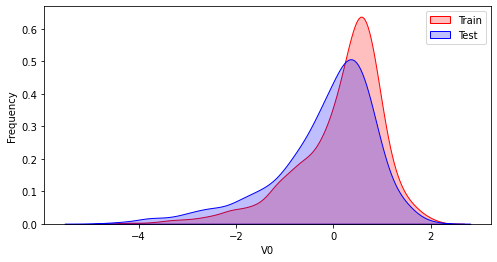

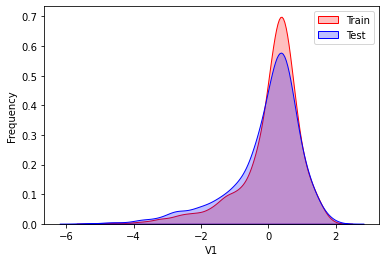

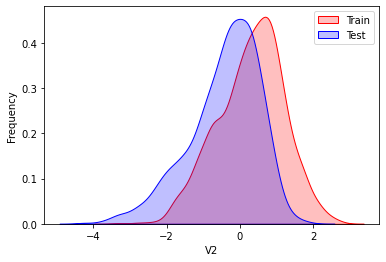

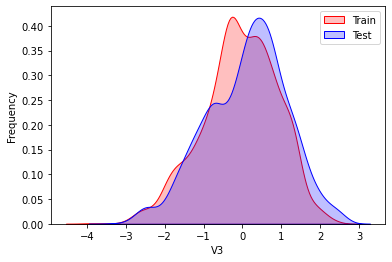

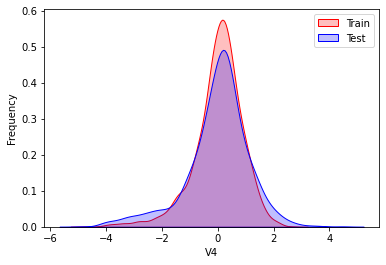

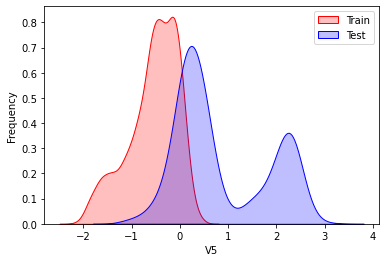

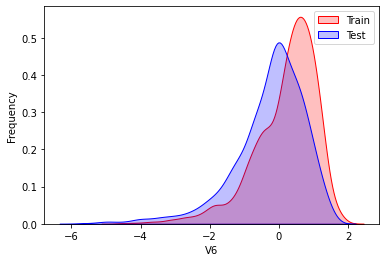

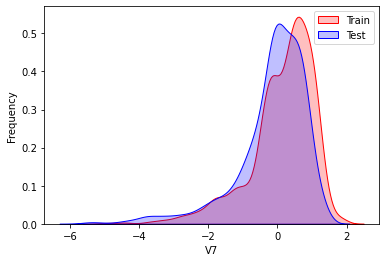

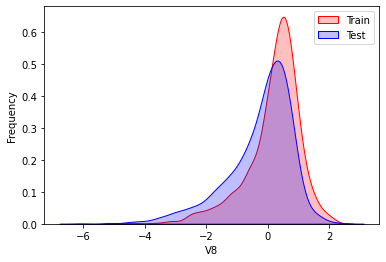

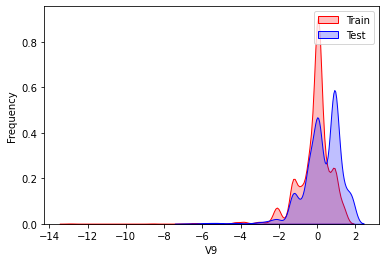

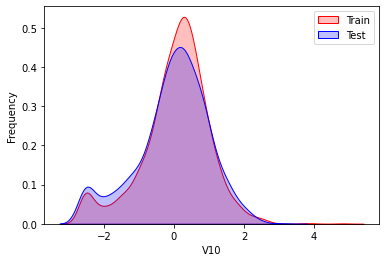

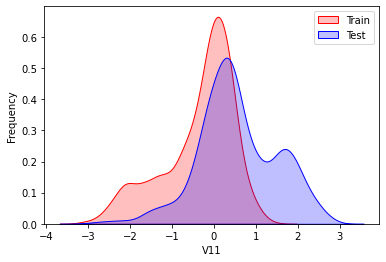

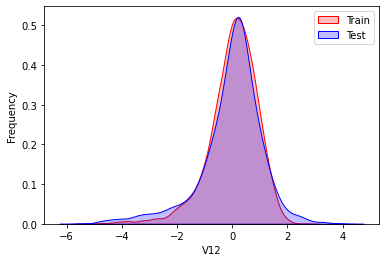

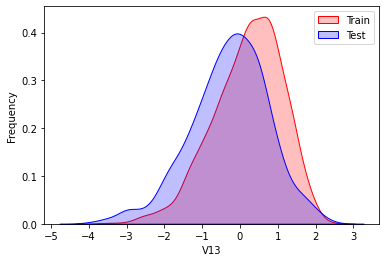

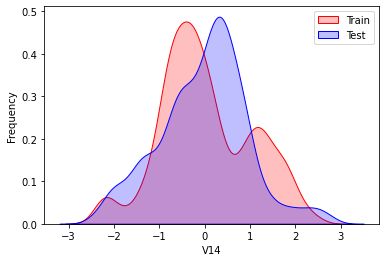

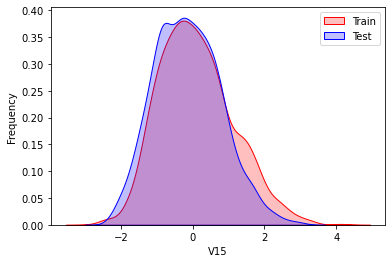

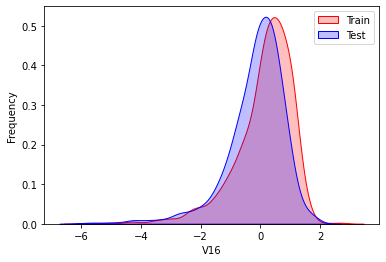

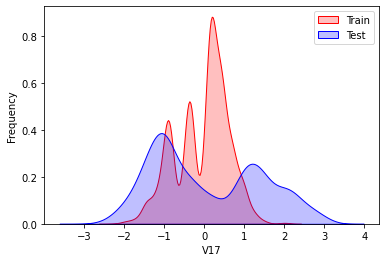

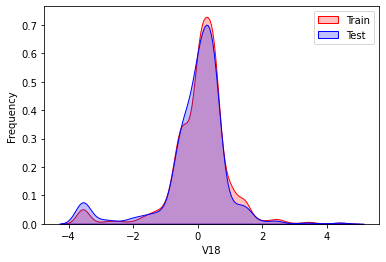

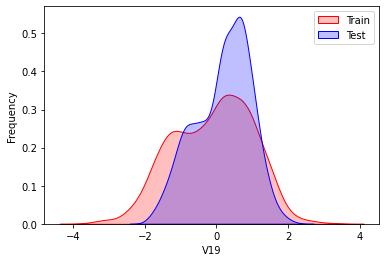

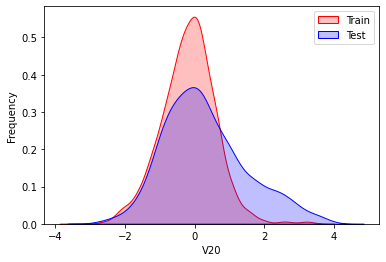

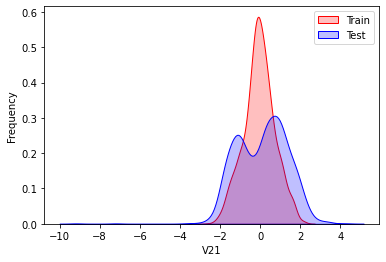

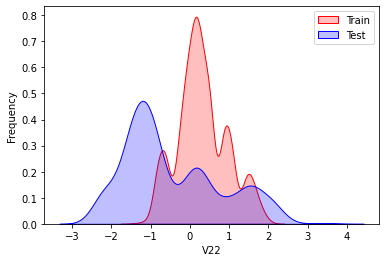

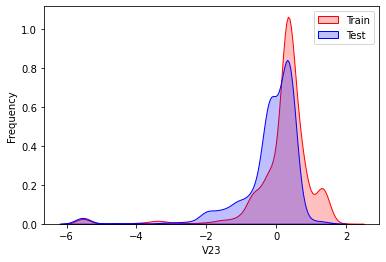

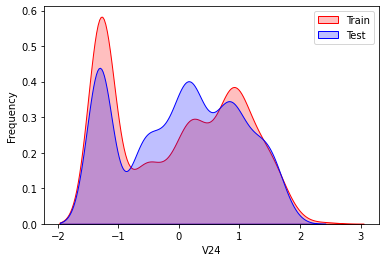

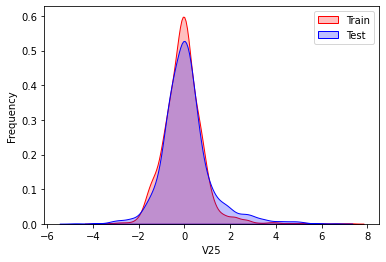

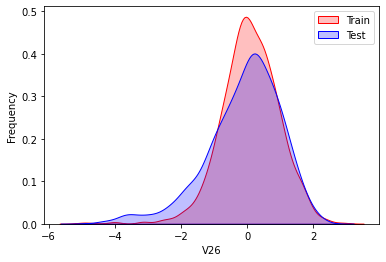

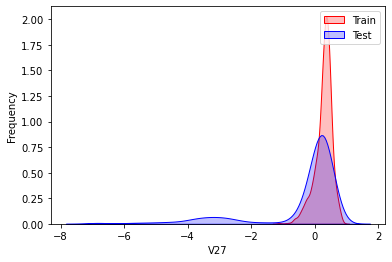

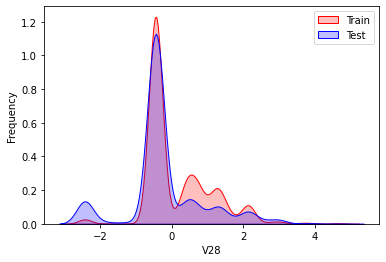

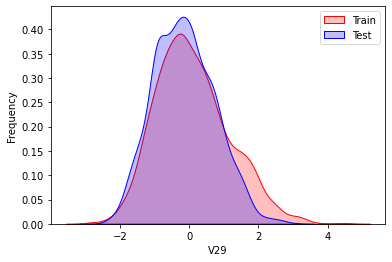

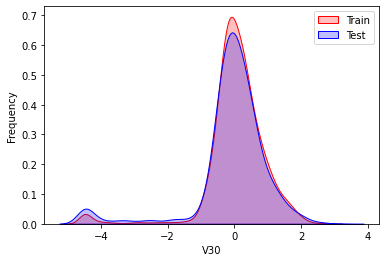

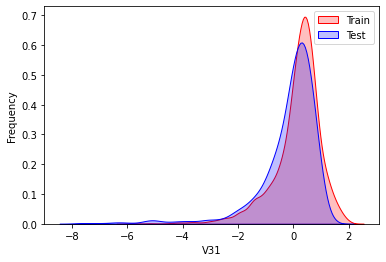

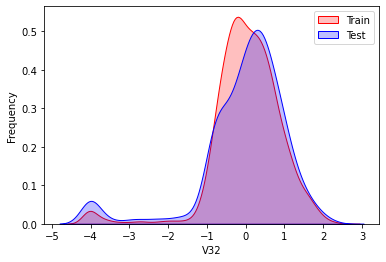

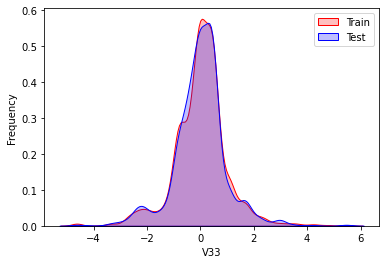

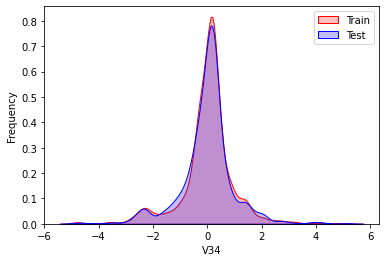

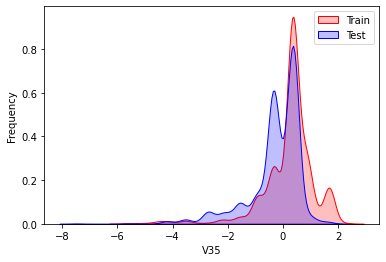

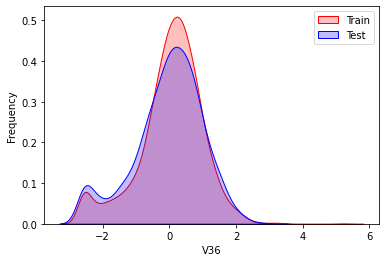

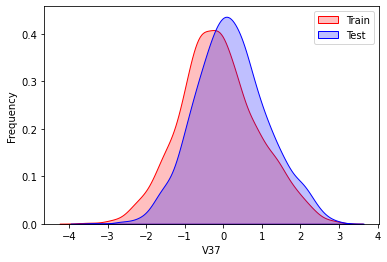

In [8]:
# 绘制train和test特征变量的分布
plt.figure(figsize=(8,4))
for i in feature_list: 
    ax = sns.kdeplot(df_train[i], color='Red',shade=True)
    ax = sns.kdeplot(df_test[i], color='Blue',shade=True)
    ax.set_xlabel(i)
    ax.set_ylabel('Frequency')
    ax.legend(['Train','Test'])
    plt.show()

由上图的数据分布可以看到特征'V2','V5','V6','V9','V11','V13','V17','V14','V21','V22','V27','V35','V37'训练集数据与测试集数据分布不一致，会导致模型泛化能力差，因此删除此类特征方法。

In [9]:
# 删除分布不一致的特征列
drop_columns=['V2','V5','V6','V9','V11','V13','V17','V14','V21','V22','V27','V35','V37'] #标注需删除的列明
df_train = df_train.drop(drop_columns,axis=1) #在训练集中删除标注的特征
df_test = df_test.drop(drop_columns, axis=1)  #在测试集中删除标注的特征

In [10]:
df_train.head()

,V0,V1,V3,V4,V7,V8,V10,V12,V15,V16,...,V26,V28,V29,V30,V31,V32,V33,V34,V36,target
0,0.566,0.016,0.407,0.452,-2.360,-0.436,-0.940,-0.073,0.000,-1.707,...,0.796,-0.450,0.136,0.109,-0.615,0.327,-4.627,-4.789,-2.608,0.175
1,0.968,0.437,0.566,0.194,-2.360,0.332,0.188,-0.134,0.000,-0.977,...,1.057,0.671,-0.128,0.124,0.032,0.600,-0.843,0.160,-0.335,0.676
2,1.013,0.568,0.370,0.112,-2.360,0.396,0.874,-0.072,-0.212,-0.618,...,0.915,1.287,-0.009,0.361,0.277,-0.116,-0.843,0.160,0.765,0.633
3,0.733,0.368,0.165,0.599,-2.086,0.403,0.011,-0.014,-0.162,-0.429,...,0.898,1.298,0.015,0.417,0.279,0.603,-0.843,-0.065,0.333,0.206
4,0.684,0.638,0.209,0.337,-2.086,0.314,-0.251,0.199,-0.138,-0.391,...,0.386,1.289,0.183,1.078,0.328,0.418,-0.843,-0.215,-0.280,0.384


In [11]:
df_test.head()

,V0,V1,V3,V4,V7,V8,V10,V12,V15,V16,...,V25,V26,V28,V29,V30,V31,V32,V33,V34,V36
0,0.368,0.380,-0.049,0.379,0.551,0.244,-0.419,0.346,0.239,-0.089,...,-0.662,-0.596,-0.449,0.047,0.057,-0.042,0.847,0.534,-0.009,-0.567
1,0.148,0.489,-0.049,0.122,0.493,-0.127,-0.403,0.465,-0.113,-0.093,...,-0.646,-0.776,-0.443,0.047,0.560,0.176,0.551,0.046,-0.220,-0.294
2,-0.166,-0.062,0.046,-0.055,0.493,-0.227,0.330,0.173,-0.192,-0.061,...,-0.473,-0.607,-0.458,-0.398,0.101,0.199,0.634,0.017,-0.234,0.373
3,0.102,0.294,0.051,-0.183,0.504,0.010,-0.431,-0.038,-0.590,-0.134,...,-0.337,-0.986,-0.456,-0.398,1.007,0.137,1.042,-0.040,-0.290,-0.666
4,0.300,0.428,0.051,-0.033,0.497,0.155,-0.162,-0.063,-0.927,-0.075,...,-0.285,-0.669,-0.458,-0.776,0.291,0.370,0.181,-0.040,-0.290,-0.140


In [12]:
# 由于特征经过筛选，重新提取训练集中的特征标签为列表
feature_list = list(df_train.columns) #提取train表中，除了target的列名
feature_list.remove('target')

## 2. 相关性分析
#### 2.1 所有特征变量与‘target‘变量的线性回归分析

In [13]:
# 查看相关性
t = df_train.corr()
t

,V0,V1,V3,V4,V7,V8,V10,V12,V15,V16,...,V26,V28,V29,V30,V31,V32,V33,V34,V36,target
V0,1.000000,0.908607,0.409576,0.781212,0.141294,0.794013,0.298443,0.751830,0.314520,0.347357,...,-0.125140,0.035119,0.302145,0.156968,0.675003,0.050951,0.056439,-0.019342,0.231417,0.873212
V1,0.908607,1.000000,0.383924,0.657790,0.205023,0.874650,0.310120,0.656186,0.164702,0.435606,...,-0.043012,0.077346,0.147096,0.175997,0.769745,0.085604,0.035129,-0.029115,0.235299,0.871846
V3,0.409576,0.383924,1.000000,0.315046,0.197836,0.411946,0.321262,0.306397,0.143457,0.394517,...,-0.027685,0.159039,0.117610,0.043966,0.421954,-0.092423,-0.007159,-0.031898,0.324475,0.512074
V4,0.781212,0.657790,0.315046,1.000000,-0.052370,0.449542,0.141129,0.927685,0.615704,0.023818,...,-0.080487,-0.044620,0.659093,0.022807,0.447016,-0.026186,0.062367,0.028659,0.113609,0.603984
V7,0.141294,0.205023,0.197836,-0.052370,1.000000,0.389987,0.310982,-0.036791,-0.291272,0.752683,...,0.160566,0.058800,-0.311363,0.170113,0.475254,0.122707,0.034508,-0.019103,0.340479,0.287815
V8,0.794013,0.874650,0.411946,0.449542,0.389987,1.000000,0.419703,0.420557,0.018366,0.680031,...,0.015724,0.122050,-0.011091,0.150258,0.878072,0.038430,0.026843,-0.036297,0.326586,0.831904
V10,0.298443,0.310120,0.321262,0.141129,0.310982,0.419703,1.000000,0.140462,-0.046737,0.546975,...,0.072366,0.056484,-0.105042,-0.036705,0.560213,-0.093213,0.016739,-0.026994,0.922190,0.394767
V12,0.751830,0.656186,0.306397,0.927685,-0.036791,0.420557,0.140462,1.000000,0.642081,0.025736,...,-0.124111,-0.062193,0.666775,0.028866,0.441963,-0.007658,0.046674,0.010122,0.112150,0.594189
V15,0.314520,0.164702,0.143457,0.615704,-0.291272,0.018366,-0.046737,0.642081,1.000000,-0.301427,...,-0.162995,-0.176732,0.951314,-0.111311,0.011768,-0.104618,0.050254,0.048602,-0.051861,0.154020
V16,0.347357,0.435606,0.394517,0.023818,0.752683,0.680031,0.546975,0.025736,-0.301427,1.000000,...,0.090949,0.177611,-0.342210,0.154794,0.778538,0.041474,0.028878,-0.054775,0.551880,0.536748


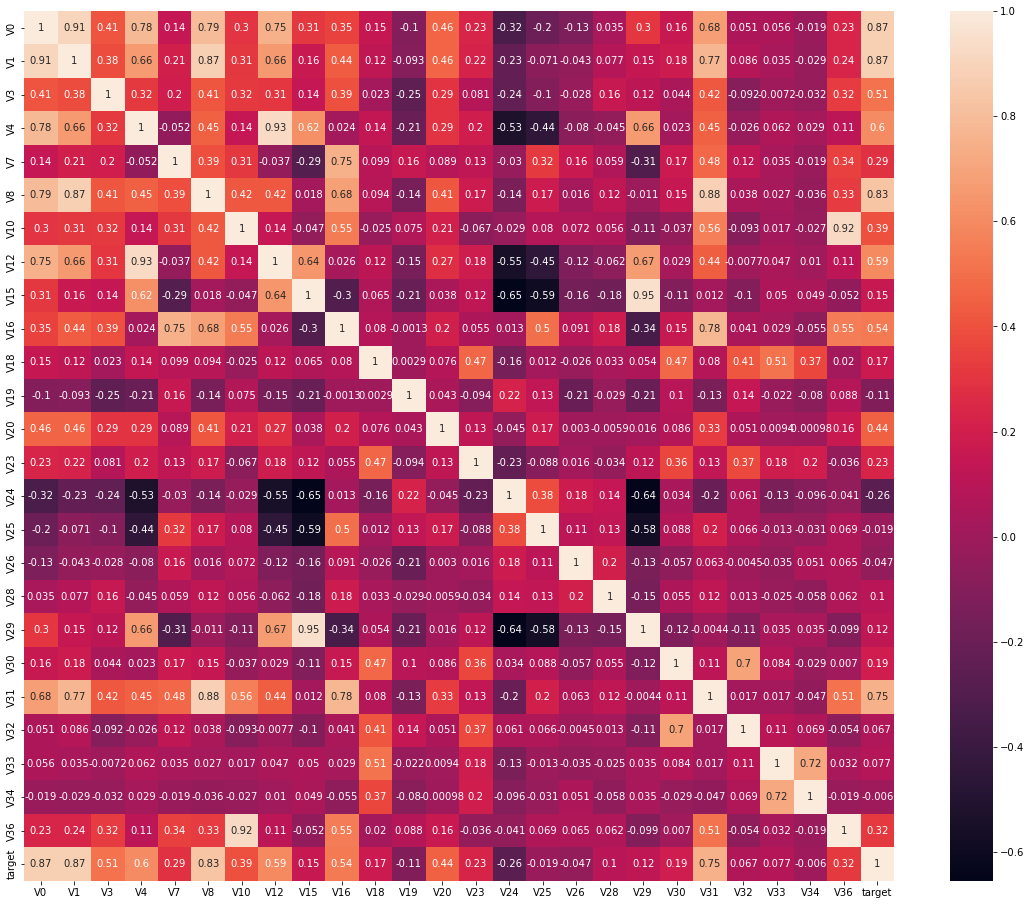

In [14]:
# 绘制相关性热力图
ax = plt.subplots(figsize=(20,16))
ax = sns.heatmap(t,square=True, annot=True)

In [15]:
# 相关系数的绝对值小于0.5为弱相关性，删除弱相关性的特征
drop_columns = t[(np.abs(t['target']<0.5))].index #筛选出target列的相关系数绝对<0.5的特征
df_train.drop(columns = drop_columns, inplace=True) #训练集中删除选定的特征列
df_test.drop(columns = drop_columns, inplace=True)  #测试集中删除选定的特征列

In [16]:
# 由于特征经过筛选，重新提取训练集中的特征标签为列表
feature_list = list(df_train.columns) #提取train表中，除了target的列名
feature_list.remove('target')

In [17]:
feature_list

['V0', 'V1', 'V3', 'V4', 'V8', 'V12', 'V16', 'V31']

In [18]:
# 合并训练集和测试集
train_x = df_train.drop(['target'], axis=1) #选取除了target列的特征列
data_fit = pd.concat([train_x, df_test])
data_fit.head()

,V0,V1,V3,V4,V8,V12,V16,V31
0,0.566,0.016,0.407,0.452,-0.436,-0.073,-1.707,-0.615
1,0.968,0.437,0.566,0.194,0.332,-0.134,-0.977,0.032
2,1.013,0.568,0.370,0.112,0.396,-0.072,-0.618,0.277
3,0.733,0.368,0.165,0.599,0.403,-0.014,-0.429,0.279
4,0.684,0.638,0.209,0.337,0.314,0.199,-0.391,0.328


In [19]:
train_xy = df_train.copy()
train_xy

,V0,V1,V3,V4,V8,V12,V16,V31,target
0,0.566,0.016,0.407,0.452,-0.436,-0.073,-1.707,-0.615,0.175
1,0.968,0.437,0.566,0.194,0.332,-0.134,-0.977,0.032,0.676
2,1.013,0.568,0.370,0.112,0.396,-0.072,-0.618,0.277,0.633
3,0.733,0.368,0.165,0.599,0.403,-0.014,-0.429,0.279,0.206
4,0.684,0.638,0.209,0.337,0.314,0.199,-0.391,0.328,0.384
...,...,...,...,...,...,...,...,...,...
2883,0.190,-0.025,0.161,0.600,-0.026,0.436,0.563,0.809,0.235
2884,0.507,0.557,0.183,0.530,0.537,0.414,0.300,0.465,1.042
2885,-0.394,-0.721,0.084,0.136,-0.818,-0.185,0.288,0.268,0.005
2886,-0.219,-0.282,-0.049,0.449,-0.596,-0.053,0.012,-0.051,0.350


In [19]:
# normalise归一化特征值
'''
nms = MinMaxScaler()
col_numeric = list(data_all.columns) #标注特征的列名

def scale_minmax(col):
    return (col - col.min()) / (col.max()-col.min())

data_all[col_numeric] = data_all[col_numeric].apply(scale_minmax, axis=0)
data_all[col_numeric].describe()

,V0,V1,V3,V4,V8,V12,V16,V31
count,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000
mean,0.694172,0.721357,0.603139,0.523743,0.715607,0.578507,0.679294,0.792709
std,0.144198,0.131443,0.152462,0.106430,0.118105,0.105088,0.112095,0.102976
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.626676,0.679416,0.503888,0.478182,0.664934,0.532892,0.629414,0.761816
50%,0.729488,0.752497,0.614270,0.535866,0.742884,0.591635,0.700258,0.815055
75%,0.790195,0.799553,0.710474,0.585036,0.790835,0.641971,0.753279,0.852229
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
# 测试集训练集归一化

train_process = train_xy.drop(['target'], axis=1)
#train_process = train_process[col_numeric].apply(scale_minmax, axis=0) # 训练集归一化
test_process = df_test.copy()
#test_process = test_process[col_numeric].apply(scale_minmax, axis=0)   # 测试集归一化

train_process.head()

,V0,V1,V3,V4,V8,V12,V16,V31
0,0.566,0.016,0.407,0.452,-0.436,-0.073,-1.707,-0.615
1,0.968,0.437,0.566,0.194,0.332,-0.134,-0.977,0.032
2,1.013,0.568,0.370,0.112,0.396,-0.072,-0.618,0.277
3,0.733,0.368,0.165,0.599,0.403,-0.014,-0.429,0.279
4,0.684,0.638,0.209,0.337,0.314,0.199,-0.391,0.328


In [21]:
test_process.head()

,V0,V1,V3,V4,V8,V12,V16,V31
0,0.368,0.380,-0.049,0.379,0.244,0.346,-0.089,-0.042
1,0.148,0.489,-0.049,0.122,-0.127,0.465,-0.093,0.176
2,-0.166,-0.062,0.046,-0.055,-0.227,0.173,-0.061,0.199
3,0.102,0.294,0.051,-0.183,0.010,-0.038,-0.134,0.137
4,0.300,0.428,0.051,-0.033,0.155,-0.063,-0.075,0.370


In [22]:
target = df_train.target
target

0       0.175
1       0.676
2       0.633
3       0.206
4       0.384
        ...  
2883    0.235
2884    1.042
2885    0.005
2886    0.350
2887    0.417
Name: target, Length: 2888, dtype: float64

##  3. 正态分布检验
### 3.1偏度检验
#### 根据偏度的检验结果，偏度=0（正态分布），偏度>0（右/正偏分布），偏度<0（左/负偏分布）。

In [23]:
for i in feature_list:
    skew = stats.skew(train_process[f'{i}'])
    print(f'The skew value of feature {i} is {skew}')

The skew value of feature V0 is -1.274557400506133
The skew value of feature V1 is -1.6362082255126171
The skew value of feature V3 is -0.3525158668876084
The skew value of feature V4 is -1.0225882649648517
The skew value of feature V8 is -1.2510117368817457
The skew value of feature V12 is -1.1495057890140747
The skew value of feature V16 is -1.524795002807165
The skew value of feature V31 is -1.6784701924519203


上图可知，所有特征的数据都左偏，所以接下来需要做Box-Cox变换，修正为正态分布。
### 3.2 峰度检验
#### 根据峰度检验结果，峰度=0（正态分布），峰度>0（峰态陡峭），峰度<0（峰态平缓）。

In [24]:
for i in feature_list:
    kurtosis = stats.kurtosis(train_process[f'{i}'])
    print(f'The kurtosis value of feature {i} is {kurtosis}')

The kurtosis value of feature V0 is 2.2081464879424457
The kurtosis value of feature V1 is 3.7069397335011525
The kurtosis value of feature V3 is -0.07853226221268583
The kurtosis value of feature V4 is 2.5857888253446397
The kurtosis value of feature V8 is 2.477237645942078
The kurtosis value of feature V12 is 2.9927019454896415
The kurtosis value of feature V16 is 3.909445710111876
The kurtosis value of feature V31 is 5.341126690479877


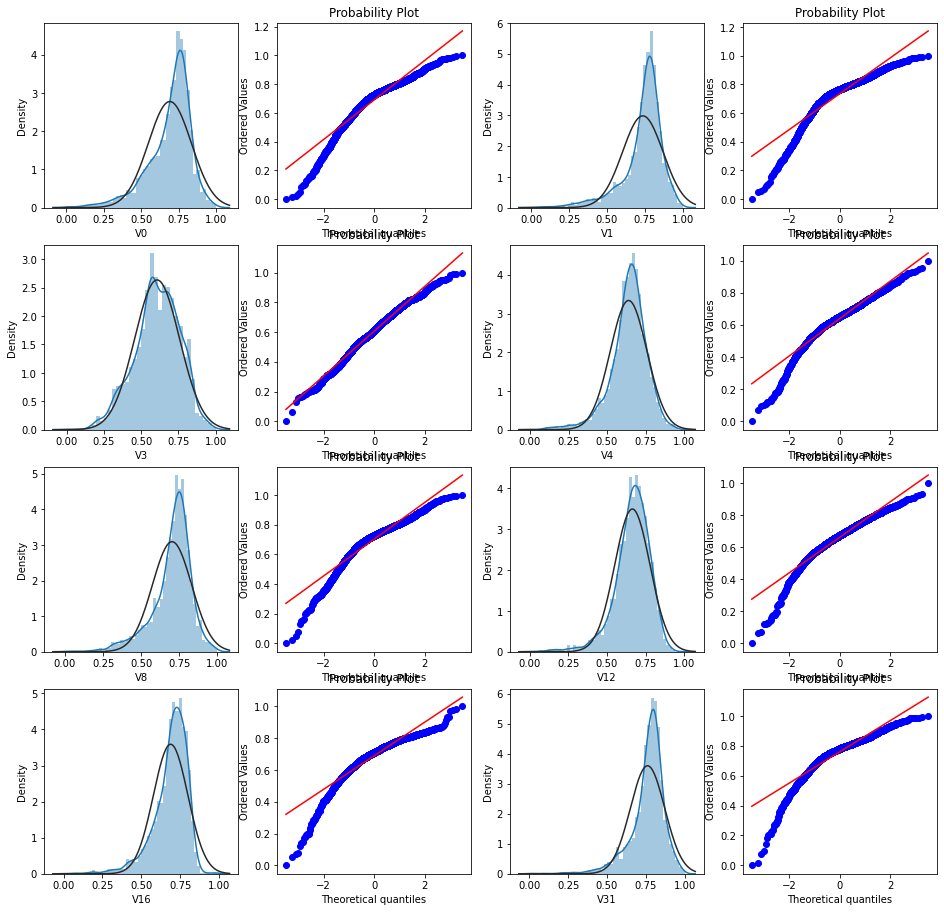

In [24]:
# 查看所有数据的直方图和Q-Q图，查看训练集正态分布情况
'''
train_cols = 4
train_rows = len(train_process.columns)
plt.figure(figsize=(4*train_cols, 4*train_rows))

i=0
for col in train_process.columns:
    i += 1
    ax = plt.subplot(train_rows, train_cols, i)
    sns.distplot(train_process[col], fit=stats.norm)
    
    i += 1
    ax = plt.subplot(train_rows, train_cols, i)
    res = stats.probplot(train_process[col], plot=plt)
plt.show()

In [25]:
# 得到所有大于3倍标准差值的所有存在异常值的行的index
#exception_index = train_process.loc[(train_process > train_process.std()*3).any(axis=1)].index
#exception_index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2878, 2879, 2880, 2881, 2882, 2883, 2884, 2885, 2886, 2887],
           dtype='int64', length=2888)

In [ ]:
# 删除异常值的行
#train_process2 = train_process.drop(labels=exception_index).copy()

### 3.3 Box-Cox变换

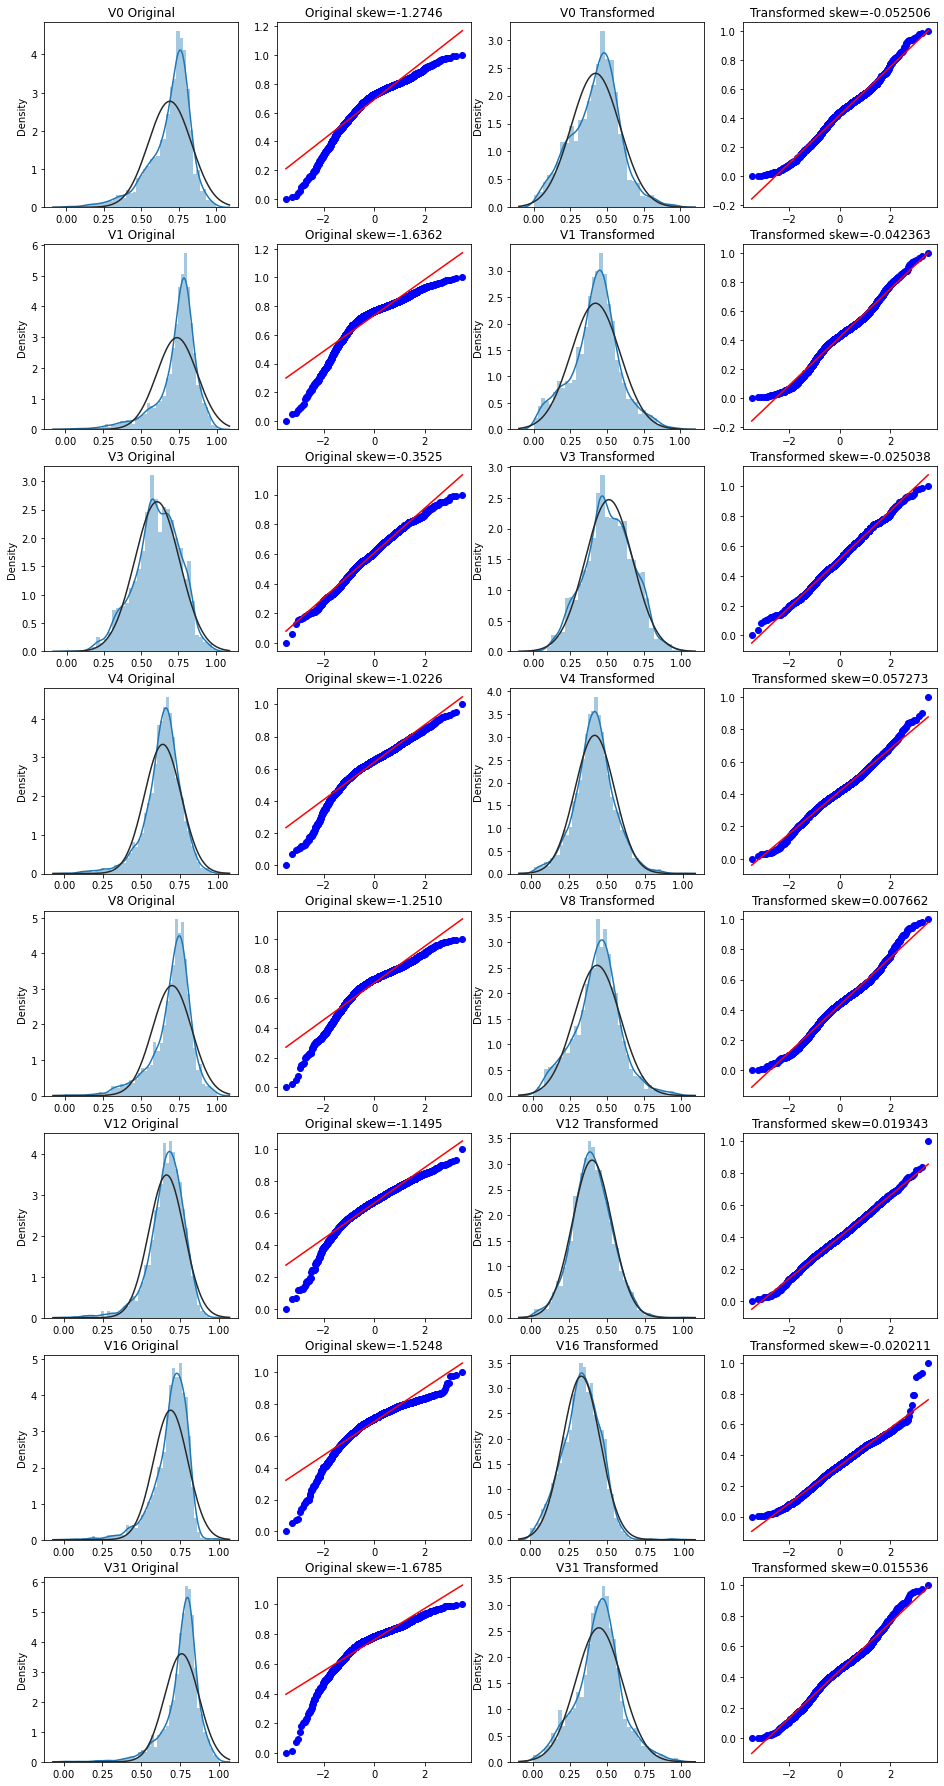

In [26]:
# 可视化Box-Cox变换对数据分布的影响
'''
fcols = 4
frows = len(train_process.columns)
plt.figure(figsize=(4*fcols, 4*frows))

# 先绘制原始正态分布直方图和数据概率分布图，方便后续比较
i=0
for var in col_numeric:
    i += 1
    plt.subplot(frows, fcols, i)
    sns.distplot(train_process[var], fit=stats.norm)  # 训练集原始正态分布直方图
    plt.title(var + ' Original')
    plt.xlabel('')
    
    i += 1
    plt.subplot(frows, fcols, i)
    _ = stats.probplot(train_process[var],plot=plt) #使用_表示临时变量，并绘制概率分布图
    plt.xlabel('')
    plt.ylabel('')
    plt.title('Original skew=' + '{:.4f}'.format(stats.skew(train_process[var])))  #标题显示原始偏度（保留4位小数）
    
# 再绘制 Box-Cox变换后的正态分布直方图和数据概率分布图
    i += 1
    plt.subplot(frows, fcols, i)
    trans_var, lambda_var = stats.boxcox(train_process[var].dropna() + 1) #数值不能为负数，因此+1
    trans_var = pd.DataFrame(nms.fit_transform(trans_var.reshape(-1,1)))[0]
    plt.subplot(frows, fcols,i)
    sns.distplot(trans_var, fit=stats.norm) # 训练集Box-Cox转换后的正态分布直方图
    plt.title(var + ' Transformed')
    plt.xlabel('')
    
    i += 1
    plt.subplot(frows, fcols,i)
    _ = stats.probplot(trans_var, plot=plt) #使用_表示临时变量，并绘制Box-Cox转换后的概率分布图
    plt.xlabel('')
    plt.ylabel('')
    plt.title('Transformed skew=' + '{:4f}'.format(stats.skew(trans_var)))

从上图左边Original图和右侧Transformed图可看出，经过Box-Cox转换后的数据更符合正态分布。因此，可以对数据进行Box-Cox转换，使得数据更加符合正态分布。

In [27]:
# 进行Box-Cox变换
'''
cols_transform = data_all.columns
for col in cols_transform:
    data_all.loc[:,col],_ = stats.boxcox(data_all.loc[:,col]+1)
    train_process.loc[:,col],_ = stats.boxcox(train_process.loc[:,col]+1)
    test_process.loc[:,col],_ = stats.boxcox(test_process.loc[:,col]+1)

In [28]:
# 提取目标值
target = df_train.target

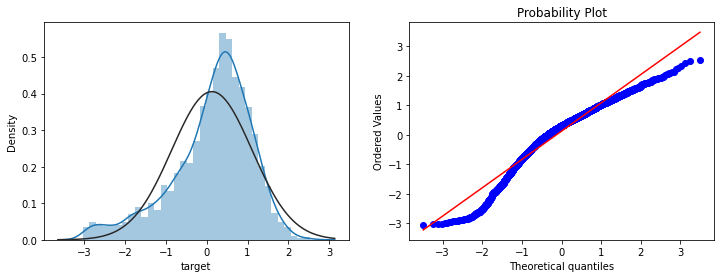

In [29]:
# 绘制目标值正态分布情况
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(target,fit=stats.norm)
plt.subplot(1,2,2)
_=stats.probplot(target, plot=plt)


In [30]:
target

0       0.175
1       0.676
2       0.633
3       0.206
4       0.384
        ...  
2883    0.235
2884    1.042
2885    0.005
2886    0.350
2887    0.417
Name: target, Length: 2888, dtype: float64

## 使用岭回归算法过滤异常值

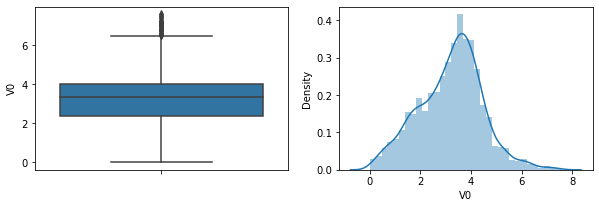

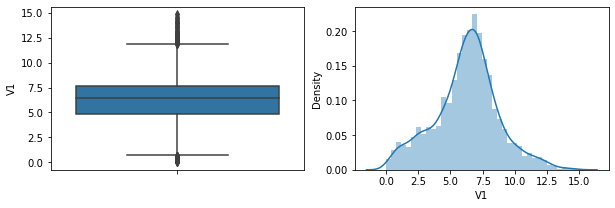

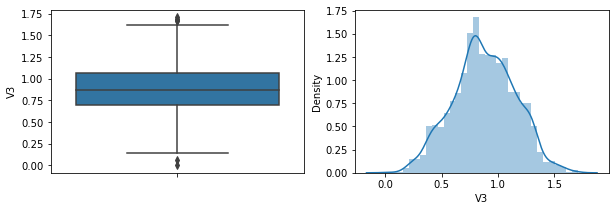

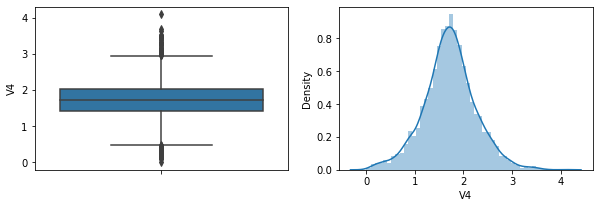

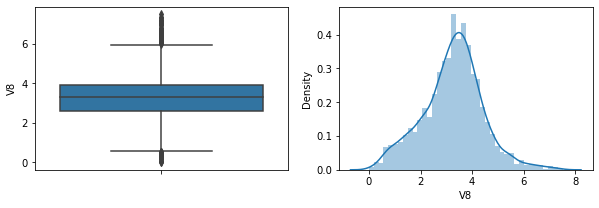

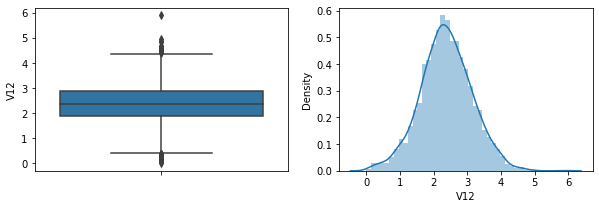

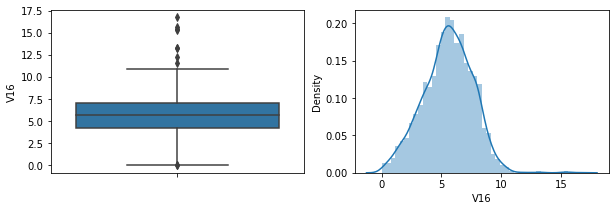

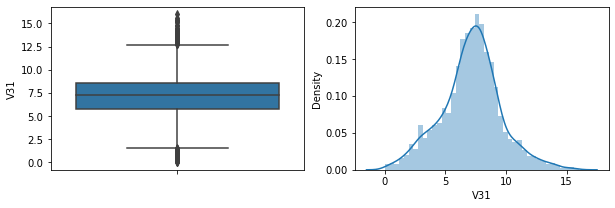

In [61]:
'''
for column in train_process.columns.tolist():
    plt.figure(figsize=(10,3))
    plt.subplot(1,2,1)
    sns.boxplot(y=train_process[column])
    
    plt.subplot(1,2,2)
    sns.distplot(train_process[column])
    plt.show()

由箱形图可知，存在大量异常值。以箱形图上边界值填充超过上边界的离群点，下边界的值填充超过下边界的离群点

In [ ]:
'''
# 定义函数，求四分之一位值和四分之三位值，作为上限和下限值
def calculate_level(V):
    q1 = np.quantile(V, 0.25)
    q3 = np.quantile(V, 0.75)
    iqr = q3 - q1
    max_level = q3 + 1.5 * iqr
    min_level = q1 - 1.5 * iqr
    return max_level, min_level

#上边界值填充超过上边界的离群点，下边界的值填充超过下边界的离群点
for column in train_process.columns.tolist():
    V = train_process[column]
    max_level, min_level = calculate_level(V)
    V[V > max_level] = max_level
    V[V < min_level] = min_level
    
train_process = 

In [25]:
from sklearn.linear_model import RidgeCV
ridge=RidgeCV(alphas=[0.0001,0.001,0.01,0.1,0.2,0.5,1,2,3,4,5,10,20,30,50])

#先用岭回归进行拟合，若异常（3σ原则）较为明显，则可将该样本过滤
ridge.fit(train_process,target)
target_predict=ridge.predict(train_process)
cond=(target - target_predict).abs() > 0.8* target.std()
cond.sum()



141

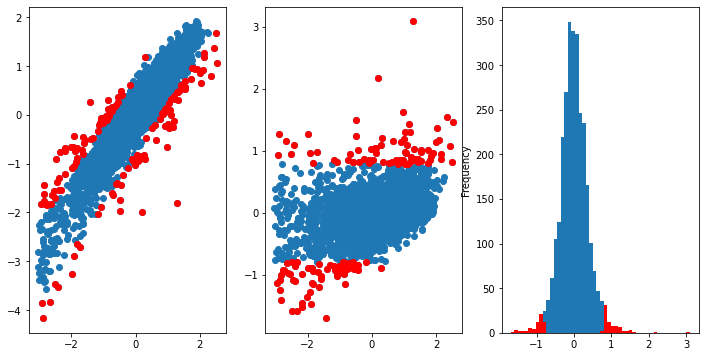

In [28]:
# 异常值可视化
plt.figure(figsize=(12,6))
axes=plt.subplot(1,3,1)
axes.scatter(target,target_predict)
axes.scatter(target[cond],target_predict[cond],c='red')

axes=plt.subplot(1,3,2)
axes.scatter(target,target - target_predict)
axes.scatter(target[cond],(target - target_predict)[cond],c='red')

axes=plt.subplot(1,3,3)
(target - target_predict).plot.hist(bins = 50,ax = axes)
(target - target_predict).loc[cond].plot.hist(bins = 50,ax = axes,color = 'r')
plt.savefig('ridge.jpg')




In [26]:
#获取行索引，异常值过滤
drop_index=train_process[cond].index
train_xy.drop(drop_index,axis=0,inplace=True)
train_xy

,V0,V1,V3,V4,V8,V12,V16,V31,target
0,0.566,0.016,0.407,0.452,-0.436,-0.073,-1.707,-0.615,0.175
1,0.968,0.437,0.566,0.194,0.332,-0.134,-0.977,0.032,0.676
2,1.013,0.568,0.370,0.112,0.396,-0.072,-0.618,0.277,0.633
3,0.733,0.368,0.165,0.599,0.403,-0.014,-0.429,0.279,0.206
4,0.684,0.638,0.209,0.337,0.314,0.199,-0.391,0.328,0.384
...,...,...,...,...,...,...,...,...,...
2883,0.190,-0.025,0.161,0.600,-0.026,0.436,0.563,0.809,0.235
2884,0.507,0.557,0.183,0.530,0.537,0.414,0.300,0.465,1.042
2885,-0.394,-0.721,0.084,0.136,-0.818,-0.185,0.288,0.268,0.005
2886,-0.219,-0.282,-0.049,0.449,-0.596,-0.053,0.012,-0.051,0.350


## 数据集拆分
因为测试集单独提供且作为比赛评定指标。对于训练集进一步拆分出交叉验证集以判断模型的预测效果，同时确保交叉验证集的数据与训练集数据完全独立

In [76]:
# 拆分交叉验证集
X = train_xy.iloc[:,:-1] #训练集
y = train_xy.iloc[:,-1:] #训练集目标值
df_train_value, df_vali_value, df_train_target,df_vali_target=train_test_split(X,y,test_size=0.25,random_state=0)

- df_train_value: 训练集特征数据集（总训练集的75%）
- df_train_target: 训练集的预测目标数据（总训练集的75%）
- df_vali_value：交叉验证集特征数据集（总训练集25%）
- df_vali_target：交叉验证集的预测目标数据（总训练集的25%）

In [77]:
# 重置数据集，确保所有数据都是从第0条开始排序
df_train_value = df_train_value.reset_index(drop=True)
df_vali_value = df_vali_value.reset_index(drop=True)
df_train_target = df_train_target.reset_index(drop=True)
df_vali_target = df_vali_target.reset_index(drop=True)
# 转化成矩阵形式
df_train_value = np.array(df_train_value)
df_vali_value = np.array(df_vali_value)
df_train_target = np.array(df_train_target)
df_vali_target = np.array(df_vali_target)

## 算法一、XGBoost

In [129]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV


# 定义参数取值范围
learning_rate = [0.01,0.05, 0.1, 0.3, 0.4, 0.5, 0.6]
subsample = [0.7,0.8,0.9]
colsample_bytree = [0.6, 0.7, 0.8, 0.9]
max_depth = [3, 4, 5, 7, 8]
n_estimators = [500,1000,2000,4500]

parameters = {'learning_rate':learning_rate,
              'subsample': subsample,
              'colsample_bytree': colsample_bytree,
              'max_depth':max_depth,
              'n_estimators':n_estimators}
model_xgb = xgb.XGBRegressor()

# 进行网格搜索
clf = GridSearchCV(model_xgb, parameters, cv=3, scoring='neg_mean_squared_error',verbose=1,return_train_score=True)
clf = clf.fit(df_train_value, df_train_target)

Fitting 3 folds for each of 1080 candidates, totalling 3240 fits


In [130]:
# 网格搜索后的最好参数为
clf.best_params_

{'colsample_bytree': 0.6,
 'learning_rate': 0.05,
 'max_depth': 3,
 'n_estimators': 500,
 'subsample': 0.7}

In [49]:
# 调用最优参数的XGBoost模型
import xgboost as xgb
model_xgb = xgb.XGBRegressor(colsample_bytree= 0.6,learning_rate=0.05,max_depth=3,n_estimators=500,subsample=0.7)
model_xgb.fit(df_train_value, df_train_target)
predict_xgb = model_xgb.predict(df_vali_value)

In [50]:
# 求出MSE
mse = mean_squared_error(df_vali_target, predict_xgb)
print('XGBoost mse=', mse)

XGBoost mse= 0.12202090528274731


## 算法二、LightGBM
#### 由于XGBoost使用网格搜索太耗费时间，本LightGBM尝试使用optuna寻找最优超参数，optuna是高效的寻找超参数的方法，大大减少运算时间。

In [36]:
# 使用optuna寻找最优超参数
!pip install optuna #安装optuna

In [51]:
import optuna
from lightgbm import LGBMRegressor
from optuna import Trial
from optuna.samplers import TPESampler
import optuna.integration.lightgbm as oplgb

In [52]:
# 定义objective
def objective(trial):
    X = train_process #训练集特征值使用归一化且正态化后的数据集
    y = target #训练集目标值使用正态化后的数据集
    df_train_value, df_vali_value, df_train_target,df_vali_target=train_test_split(X,y,test_size=0.25,random_state=10)
    param = {
             'metric':'rmse',
             'n_estimators': trial.suggest_int('n_estimators',1,1000),
             'max_depth': trial.suggest_int('max_depth', 1, 10),
             'num_leaves':trial.suggest_int('num_leaves', 1, 50),
             'min_child_samples':trial.suggest_int('min_child_samples', 1, 500),
             'learning_rate':trial.suggest_loguniform('learning_rate', 0.005, 0.5),
             'colsample_bytree':trial.suggest_discrete_uniform('colsample_bytree', 0.1, 1, 0.01),
             'nthread': -1
            }
    model = LGBMRegressor(**param)
    model.fit(df_train_value, df_train_target)
    preds = model.predict(df_vali_value)
    mse = mean_squared_error(df_vali_target, preds)
    return mse
    
    

In [54]:
# 调参
study = optuna.create_study(direction='minimize')
n_trials=10
study.optimize(objective, n_trials=n_trials)

[I 2022-04-20 23:12:53,224] A new study created in memory with name: no-name-82678d7f-1648-4235-9ff3-93917a0e40a4
[I 2022-04-20 23:12:53,436] Trial 0 finished with value: 0.17401365690957502 and parameters: {'n_estimators': 416, 'max_depth': 9, 'num_leaves': 14, 'min_child_samples': 406, 'learning_rate': 0.14914432012572607, 'colsample_bytree': 0.71}. Best is trial 0 with value: 0.17401365690957502.


[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1


[I 2022-04-20 23:12:53,492] Trial 1 finished with value: 0.2185951385272479 and parameters: {'n_estimators': 63, 'max_depth': 2, 'num_leaves': 28, 'min_child_samples': 340, 'learning_rate': 0.03233241574005573, 'colsample_bytree': 0.86}. Best is trial 0 with value: 0.17401365690957502.


[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1


[I 2022-04-20 23:12:53,687] Trial 2 finished with value: 0.16510996275180004 and parameters: {'n_estimators': 690, 'max_depth': 6, 'num_leaves': 28, 'min_child_samples': 301, 'learning_rate': 0.01962597710113823, 'colsample_bytree': 0.59}. Best is trial 2 with value: 0.16510996275180004.
[I 2022-04-20 23:12:53,785] Trial 3 finished with value: 0.15693083847355435 and parameters: {'n_estimators': 377, 'max_depth': 2, 'num_leaves': 46, 'min_child_samples': 201, 'learning_rate': 0.017270824797564286, 'colsample_bytree': 0.69}. Best is trial 3 with value: 0.15693083847355435.


[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1


[I 2022-04-20 23:12:53,928] Trial 4 finished with value: 0.20362397732070822 and parameters: {'n_estimators': 430, 'max_depth': 4, 'num_leaves': 48, 'min_child_samples': 443, 'learning_rate': 0.008779646341942775, 'colsample_bytree': 0.83}. Best is trial 3 with value: 0.15693083847355435.


[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1


[I 2022-04-20 23:12:54,423] Trial 5 finished with value: 0.16295829703242182 and parameters: {'n_estimators': 826, 'max_depth': 6, 'num_leaves': 29, 'min_child_samples': 285, 'learning_rate': 0.016795559900797844, 'colsample_bytree': 0.8}. Best is trial 3 with value: 0.15693083847355435.


[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1


[I 2022-04-20 23:12:54,881] Trial 6 finished with value: 0.1540871286206732 and parameters: {'n_estimators': 996, 'max_depth': 9, 'num_leaves': 49, 'min_child_samples': 240, 'learning_rate': 0.01457222463658742, 'colsample_bytree': 0.35}. Best is trial 6 with value: 0.1540871286206732.
[I 2022-04-20 23:12:54,921] Trial 7 finished with value: 0.2204021557969433 and parameters: {'n_estimators': 119, 'max_depth': 6, 'num_leaves': 5, 'min_child_samples': 382, 'learning_rate': 0.027239503810004076, 'colsample_bytree': 0.16}. Best is trial 6 with value: 0.1540871286206732.
[I 2022-04-20 23:12:55,069] Trial 8 finished with value: 0.17143585096678274 and parameters: {'n_estimators': 756, 'max_depth': 1, 'num_leaves': 4, 'min_child_samples': 213, 'learning_rate': 0.007184791125432647, 'colsample_bytree': 0.58}. Best is trial 6 with value: 0.1540871286206732.


[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] num_threads is set with nthread=-1, will be overridden by n_jobs=-1. Current value: num_threads=-1


[I 2022-04-20 23:12:55,168] Trial 9 finished with value: 0.1581876447760594 and parameters: {'n_estimators': 283, 'max_depth': 7, 'num_leaves': 2, 'min_child_samples': 102, 'learning_rate': 0.46692550327549065, 'colsample_bytree': 0.54}. Best is trial 6 with value: 0.1540871286206732.


In [55]:
# 获取optuna寻找到的LightGBM最优参数
study.best_params

{'n_estimators': 996,
 'max_depth': 9,
 'num_leaves': 49,
 'min_child_samples': 240,
 'learning_rate': 0.01457222463658742,
 'colsample_bytree': 0.35}

In [56]:
# 调用最优参数的LightGBM模型
model_lgbm = LGBMRegressor(n_estimators=996,max_depth=9,num_leaves=49,
                           min_child_samples=240,learning_rate=0.01457222463658742,colsample_bytree=0.35)
model_lgbm.fit(df_train_value, df_train_target)
predict_lgbm = model_lgbm.predict(df_vali_value)

In [57]:
# 求出MSE
mse = mean_squared_error(df_vali_target, predict_lgbm)
print('LightGBM mse=', mse)

LightGBM mse= 0.14652698307507306


## 算法三、随机森林

In [121]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=4000, random_state=10)
model_rf.fit(df_train_value, df_train_target)

RandomForestRegressor(n_estimators=4000, random_state=10)

In [122]:
predict_rf = model_rf.predict(df_vali_value)

In [123]:
rfmse = mean_squared_error(df_vali_target, predict_rf)
print('未深度调参随机森林的mse是：',rfmse)

未深度调参随机森林的mse是： 0.10025924725268122


#### 随机森林的网格搜索

In [37]:
# 定义参数取值范围
min_samples_leaf = [1,2,3]
min_samples_split = [2,3]
max_depth = [2, 3, 4, 5,6, 7, 8]
n_estimators = [1000,2000,4500,5000]

parameters = {'min_samples_leaf':min_samples_leaf,
              'min_samples_split': min_samples_split,
              'max_depth':max_depth,
              'n_estimators':n_estimators,
             'max_features':('auto','sqrt','log2')}
model_rf_grid = RandomForestRegressor()

# 进行网格搜索
clf = GridSearchCV(model_rf_grid, parameters, cv=3, scoring='neg_mean_squared_error',verbose=1,return_train_score=True)
clf = clf.fit(df_train_value, df_train_target)

Fitting 3 folds for each of 504 candidates, totalling 1512 fits


In [38]:
# 网格搜索后的最好参数为
clf.best_params_

{'max_depth': 8,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [242]:
# 调用最优参数的随机森林模型
model_rf_grid = RandomForestRegressor(max_depth=23,min_samples_leaf=2,
                                      min_samples_split=2,n_estimators=8800,max_features='log2')

model_rf_grid.fit(df_train_value, df_train_target)
predict_rf_grid = model_rf_grid.predict(df_vali_value)

In [243]:
# 求出MSE
mse = mean_squared_error(df_vali_target, predict_rf_grid)
print('RandomForestRegressor mse=', mse)

RandomForestRegressor mse= 0.09995676808718792


In [73]:
# 使用optuna求最优参数
# 定义objective
'''
def objective2(trial):
    X = train_process #训练集特征值使用归一化且正态化后的数据集
    y = target #训练集目标值使用正态化后的数据集
    df_train_value, df_vali_value, df_train_target,df_vali_target=train_test_split(X,y,test_size=0.25,random_state=10)
    param = {
             'metric':'rmse',
             'n_estimators': trial.suggest_int('n_estimators',1,1000),
             'max_depth': trial.suggest_int('max_depth', 1, 10),
             'min_samples_leaf':trial.suggest_int('min_samples_leaf', 1, 10),
             'min_samples_split':trial.suggest_int('min_samples_split', 1, 10),
            }
    model = RandomForestRegressor(**param)
    model.fit(df_train_value, df_train_target)
    preds = model.predict(df_vali_value)
    mse = mean_squared_error(df_vali_target, preds)
    return mse
    

In [78]:
# 调参
'''
study = optuna.create_study(direction='minimize')
n_trials=5
study.optimize(objective2, n_trials=n_trials)

SyntaxError: EOF while scanning triple-quoted string literal (3471399983.py, line 5)

## 测试集预测

In [113]:
X

,V0,V1,V3,V4,V8,V12,V16,V31
0,0.566,0.016,0.407,0.452,-0.436,-0.073,-1.707,-0.615
1,0.968,0.437,0.566,0.194,0.332,-0.134,-0.977,0.032
2,1.013,0.568,0.370,0.112,0.396,-0.072,-0.618,0.277
3,0.733,0.368,0.165,0.599,0.403,-0.014,-0.429,0.279
4,0.684,0.638,0.209,0.337,0.314,0.199,-0.391,0.328
...,...,...,...,...,...,...,...,...
2883,0.190,-0.025,0.161,0.600,-0.026,0.436,0.563,0.809
2884,0.507,0.557,0.183,0.530,0.537,0.414,0.300,0.465
2885,-0.394,-0.721,0.084,0.136,-0.818,-0.185,0.288,0.268
2886,-0.219,-0.282,-0.049,0.449,-0.596,-0.053,0.012,-0.051


In [114]:
y

,target
0,0.175
1,0.676
2,0.633
3,0.206
4,0.384
...,...
2883,0.235
2884,1.042
2885,0.005
2886,0.350


In [115]:
test_process

,V0,V1,V3,V4,V8,V12,V16,V31
0,0.368,0.380,-0.049,0.379,0.244,0.346,-0.089,-0.042
1,0.148,0.489,-0.049,0.122,-0.127,0.465,-0.093,0.176
2,-0.166,-0.062,0.046,-0.055,-0.227,0.173,-0.061,0.199
3,0.102,0.294,0.051,-0.183,0.010,-0.038,-0.134,0.137
4,0.300,0.428,0.051,-0.033,0.155,-0.063,-0.075,0.370
...,...,...,...,...,...,...,...,...
1920,-1.362,-1.553,-0.444,0.381,-4.074,0.396,-5.143,-5.793
1921,-2.698,-3.452,-1.066,-1.385,-4.393,-1.786,-5.774,-7.698
1922,-2.615,-3.564,-0.422,-1.272,-5.196,-1.151,-4.752,-6.111
1923,-2.661,-3.646,-0.699,-1.270,-4.735,-1.512,-4.200,-5.268


In [52]:
df_test = np.array(df_test) #转化成矩阵形式

In [249]:
# 使用MSE指标最低的模型进行预测，即随机森林算法模型：
X_train = X
y_train = y
X_test = test_process

model_rf_grid.fit(df_train_value, df_train_target)
predict_test = model_rf_grid.predict(X_test)

In [245]:
test_submit = pd.read_csv(r'./zhengqi_test.txt',sep='\t')
test_submit['target']=predict_test

In [246]:
test_submit.head()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
0,0.368,0.380,-0.225,-0.049,0.379,0.092,0.550,0.551,0.244,0.904,...,0.047,0.057,-0.042,0.847,0.534,-0.009,-0.190,-0.567,0.388,0.424675
1,0.148,0.489,-0.247,-0.049,0.122,-0.201,0.487,0.493,-0.127,0.904,...,0.047,0.560,0.176,0.551,0.046,-0.220,0.008,-0.294,0.104,0.342894
2,-0.166,-0.062,-0.311,0.046,-0.055,0.063,0.485,0.493,-0.227,0.904,...,-0.398,0.101,0.199,0.634,0.017,-0.234,0.008,0.373,0.569,-0.052246
3,0.102,0.294,-0.259,0.051,-0.183,0.148,0.474,0.504,0.010,0.904,...,-0.398,1.007,0.137,1.042,-0.040,-0.290,0.008,-0.666,0.391,0.149488
4,0.300,0.428,0.208,0.051,-0.033,0.116,0.408,0.497,0.155,0.904,...,-0.776,0.291,0.370,0.181,-0.040,-0.290,0.008,-0.140,-0.497,0.358395


In [247]:
predict_submit = pd.DataFrame(predict_test)

In [248]:
predict_submit.to_csv('./predict_.txt',header=None,index=False)